@Anastasia to do:
* add white background
* add OSM layer
* check for unique string values in Status col ("NONE" = the rest of the street NW?)
* compare OSM layer with rest ("NONE) layer!!
* savefig

In [1]:
# -*- coding: utf-8 -*-
"""
To read Portland's bicycle network.
"""

import geopandas as gpd
import folium
import matplotlib.pyplot as plt

net = gpd.read_file("./data/Bicycle_Network.geojson")
PORTLAND_COORD = [45.5428,-122.6544]

In [36]:
net.head()

,OBJECTID,TranPlanID,SegmentName,Status,Facility,YearBuilt,Shape_Length,YearRetired,SCS,LengthMiles,geometry
0,1,TP06-0000001,SW 65TH AVE,RECOMM,NG,NaN,192.430464,NaN,None,0.084,"LINESTRING (-122.74368 45.48709, -122.74367 45..."
1,2,TP06-0000002,SW BOUNDARY ST,RECOMM,NG,NaN,231.862884,NaN,None,0.101,"LINESTRING (-122.74168 45.48586, -122.74377 45..."
2,3,TP06-0000003,SW BOUNDARY ST,RECOMM,NG,NaN,73.621507,NaN,None,0.032,"LINESTRING (-122.74102 45.48586, -122.74168 45..."
3,4,TP06-0000004,SW PENDLETON ST,RECOMM,ESR,NaN,336.626010,NaN,None,0.147,"LINESTRING (-122.71676 45.48065, -122.71688 45..."
4,5,TP06-0000005,SW SUNSET BLVD,ACTIVE,BL,2014.0,146.757123,NaN,None,0.064,"LINESTRING (-122.69556 45.48098, -122.69617 45..."


In [4]:
m = folium.Map(location = PORTLAND_COORD, zoom_start = 12) 
list_status = ["RECOMM", "ACTIVE", "RETIRED", "PLANNED"]
color_dict = dict(RECOMM = "blue", ACTIVE = "green", 
                  RETIRED = "black", PLANNED = "red")
size = dict()
for stat in list_status :
    new_layer = folium.FeatureGroup(stat, show = False)
    batch_size = 0
    for ind in net[net["Status"] == stat].index:
        pos = []
        for val in list(net["geometry"][ind].coords[:]):
            pos.append(list(reversed(val)))
        folium.PolyLine(locations = pos,
                        color = color_dict[stat],
                        popup = "Length = {} \n Name = {}".format(
                            net["LengthMiles"][ind], 
                            net["SegmentName"][ind])
                        ).add_to(new_layer)
        if net["LengthMiles"][ind] > 0 :
            batch_size +=  net["LengthMiles"][ind]
    new_layer.add_to(m)
    size[stat] = batch_size
folium.LayerControl().add_to(m)  
m.save("Portland_map.html")

In [2]:
# filter by status
list_status = ["NONE", "RECOMM", "ACTIVE",  "PLANNED"]
coldict = {"RECOMM": "blue",
          "ACTIVE": "green",
          #"RETIRED": "grey",
          "PLANNED": "red",
          "NONE": "grey"}
linedict = {"RECOMM": 0.5,
          "ACTIVE": 2,
          #"RETIRED": 0,
          "PLANNED": 2,
          "NONE": 0.5}

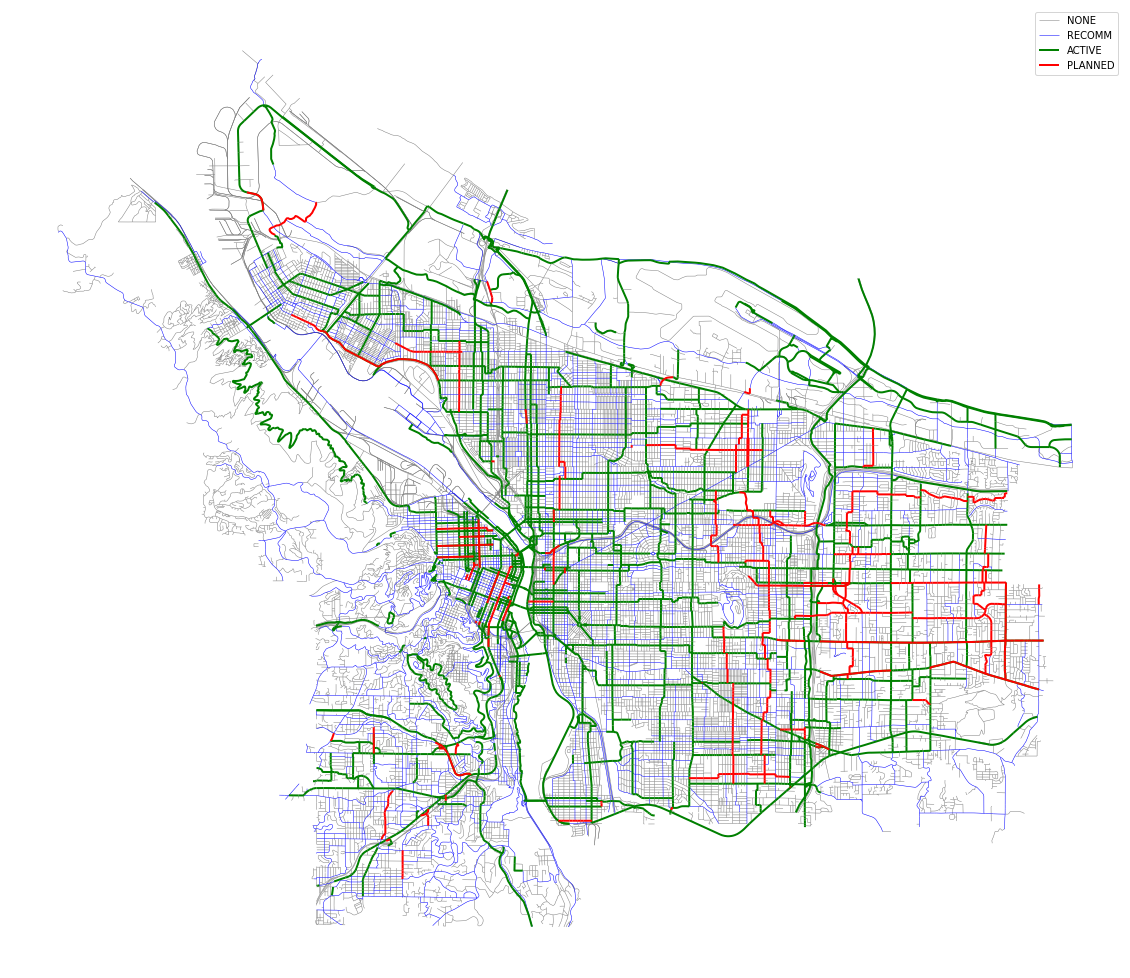

In [4]:
fig, ax = plt.subplots(figsize = (20, 20))
#ox.plot_graph(portland_osm, ax = ax, bgcolor = 'w', 
#              node_color = 'black', node_size = 0, edge_color = 'black', 
#               edge_linewidth = 0.1)
for stat in list_status:
    net[net["Status"]==stat].plot(ax = ax, color = coldict[stat], label = stat, linewidth = linedict[stat])
ax.axis("off")
ax.legend();
#plt.show()
plt.savefig("portlandtest.png", dpi = 400)

In [61]:
?gpd.GeoDataFrame.plot